# Assignment

Exercise 6

For this exercise you can use either Python with sklearn or Weka.

* Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?

* Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?

* Do you see any overlap between the PCA features and those obtained from feature selection?


# Imports

In [1]:
# Standard imports for pandas and sklearn sample datasets
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pylab as pl
from sklearn import decomposition
from sklearn import preprocessing

# Loading csv into Dataframe

In [2]:
# Load data from csv
mushroom_data = pd.read_csv("./agaricus-lepiota.csv", dtype="category")
df = pd.DataFrame(mushroom_data) # Put into dataframe

#  Feature selection using a classifier evaluator

In [3]:
y_pred = df["edibility"] #Collect data from column that we want to predict
x_data = df.drop('edibility', 1) # Dataset to find features that correlates with y, need to drop y from x.

X, y = pd.get_dummies(x_data), pd.get_dummies(y_pred) # variables with dummy data


print("Before X.shape: ", X.shape) # Before shape

skb = SelectKBest(chi2, k=5)
skb.fit(X, y)
X_new = skb.transform(X)

print("After X.shape : ", X_new.shape) # After shape

print("The most discriminative features: ")
selectedFeat = [X.columns[i] for i in skb.get_support(indices=True)]
print(selectedFeat)

Before X.shape:  (8124, 117)
After X.shape :  (8124, 5)
The most discriminative features: 
['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']


# Principal Components Analysis

In [4]:
data_scaled = pd.DataFrame(preprocessing.scale(X),columns = X.columns) 

print("Original space:",data_scaled.shape)
pca = decomposition.PCA(n_components=5)
pca.fit(data_scaled)
Xpca = pca.transform(data_scaled)

print("PCA space:",Xpca.shape, "\n")

pcaDF = pd.DataFrame(
        pca.components_,
        columns=X.columns,
    )

#Get columns with maxvalues
pca_names = pcaDF.idxmax(axis=1).to_list()
print(pca_names)

Original space: (8124, 117)
PCA space: (8124, 5) 

['stalk-surface-above-ring_k', 'stalk-root_?', 'gill-attachment_a', 'habitat_g', 'odor_m']


# Visualizations of PCA

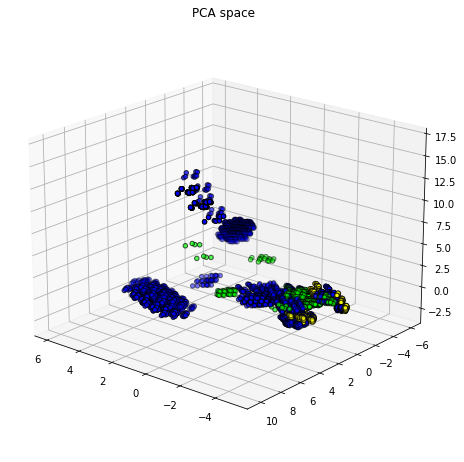

In [5]:
fig = plt.figure(2, figsize=(8, 6))
plt.clf()
ax2 = Axes3D(fig, elev=20, azim=130)

#Color everything red from scratch
colors=["yellow" for x in X.to_numpy()]

# Color selectedFeatures to see overlap BLUE ARE SELECTED FEATURES
for name in selectedFeat:
    for index in range(len(Xpca)):
        if X[name][index] == 1:
            colors[index] = "lime"

#Color pca groupings
for name in pca_names:
    for index in range(len(Xpca)):
        if X[name][index] == 1:
            colors[index] = "blue"
            

            
#Plot data points    
ax2.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=colors, cmap=plt.cm.nipy_spectral, edgecolor='k')

#Set title
ax2.set_title("PCA space")

plt.show() #Show image and hold

From the visualisation above, we can see that blue(PCA groupings) and green(selected features) have some overlap.
We can also see that the features we selected using a classifier had both stalk-surface-above-ring and odor, which can also be found in the PCA components